In [410]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import VerticalPitch
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

In [2]:
#everything below until pd.concat is basically me just copy pasting curls into the code in order 
#to get responses and scrape the data
response = requests.get(
    'https://www.sofascore.com/charlotte-fc-inter-miami-cf/ccKcsiHld#10952027',
    headers={
        'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'})

In [3]:
response.status_code

200

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [362]:
import requests

headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"13fcd9adab"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

response = requests.get('https://api.sofascore.com/api/v1/event/10952057/shotmap', headers=headers)

In [363]:
response.status_code

304

In [364]:
headers['If-Modified-Since'] = 'Sun, 22 Nov 2023 00:00:00 GMT'

In [365]:
response = requests.get('https://api.sofascore.com/api/v1/event/10952057/shotmap', headers=headers)

In [366]:
response.status_code

200

In [367]:
shots = response.json()

In [368]:
shots

{'shotmap': [{'player': {'name': 'Dave Romney',
    'slug': 'dave-romney',
    'shortName': 'D. Romney',
    'position': 'D',
    'userCount': 45,
    'id': 800377},
   'isHome': True,
   'shotType': 'goal',
   'goalType': 'regular',
   'situation': 'corner',
   'playerCoordinates': {'x': 5.1, 'y': 55, 'z': 0},
   'bodyPart': 'head',
   'goalMouthLocation': 'low-right',
   'goalMouthCoordinates': {'x': 0, 'y': 46.7, 'z': 3.2},
   'xg': 0.26326230168343,
   'xgot': 0.7345,
   'id': 2239378,
   'time': 85,
   'timeSeconds': 5085,
   'draw': {'start': {'x': 55, 'y': 5.1},
    'end': {'x': 53.3, 'y': 0},
    'goal': {'x': 53.3, 'y': 96.8}},
   'reversedPeriodTime': 6,
   'reversedPeriodTimeSeconds': 315,
   'incidentType': 'shot'},
  {'player': {'name': 'Karol Świderski',
    'slug': 'karol-swiderski',
    'shortName': 'K. Świderski',
    'position': 'F',
    'userCount': 3292,
    'id': 576438},
   'isHome': False,
   'shotType': 'goal',
   'goalType': 'regular',
   'situation': 'regular'

In [369]:
df5 = pd.json_normalize(shots['shotmap'])

In [370]:
#This is to filter out shots for home vs away team in this case NYRB is Home and CLTFC is Away
df5 = df5[df5['isHome'] == False]

In [371]:
df5

,isHome,shotType,goalType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,...,draw.goal.x,draw.goal.y,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y,player.firstName,player.lastName,addedTime
1,False,goal,regular,regular,left-foot,low-left,0.115291,0.4006,2239373,84,...,46.0,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,block,NaN,assisted,left-foot,low-centre,0.057418,NaN,2239360,83,...,50.0,81.0,4.0,50.0,0.0,50.0,4.0,NaN,NaN,NaN
3,False,miss,NaN,assisted,head,close-left,0.040935,NaN,2239354,82,...,43.0,62.5,NaN,NaN,NaN,NaN,NaN,,,NaN
5,False,save,NaN,regular,right-foot,low-left,0.095959,0.1617,2239316,75,...,47.7,97.5,1.0,51.4,0.0,51.4,1.0,NaN,NaN,NaN
6,False,block,NaN,regular,right-foot,low-centre,0.103423,NaN,2239314,75,...,49.4,81.0,9.2,49.1,0.0,49.1,9.2,NaN,NaN,NaN
7,False,block,NaN,assisted,right-foot,low-centre,0.125749,NaN,2239310,75,...,51.7,81.0,10.6,48.9,0.0,48.9,10.6,NaN,NaN,NaN
11,False,miss,NaN,assisted,left-foot,close-high,0.087533,NaN,2239243,61,...,45.9,41.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,False,miss,NaN,assisted,head,left,0.087580,NaN,2239209,54,...,32.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,False,miss,NaN,assisted,right-foot,high,0.021549,NaN,2239171,50,...,54.1,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,False,miss,NaN,corner,head,close-high,0.198071,NaN,2239165,48,...,51.9,51.4,NaN,NaN,NaN,NaN,NaN,Adilson Malanda,,NaN


In [416]:
result_df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33], axis = 0, ignore_index=True)

In [407]:
result_df.to_csv('/Users/calvi/Downloads/check.csv', index=False)

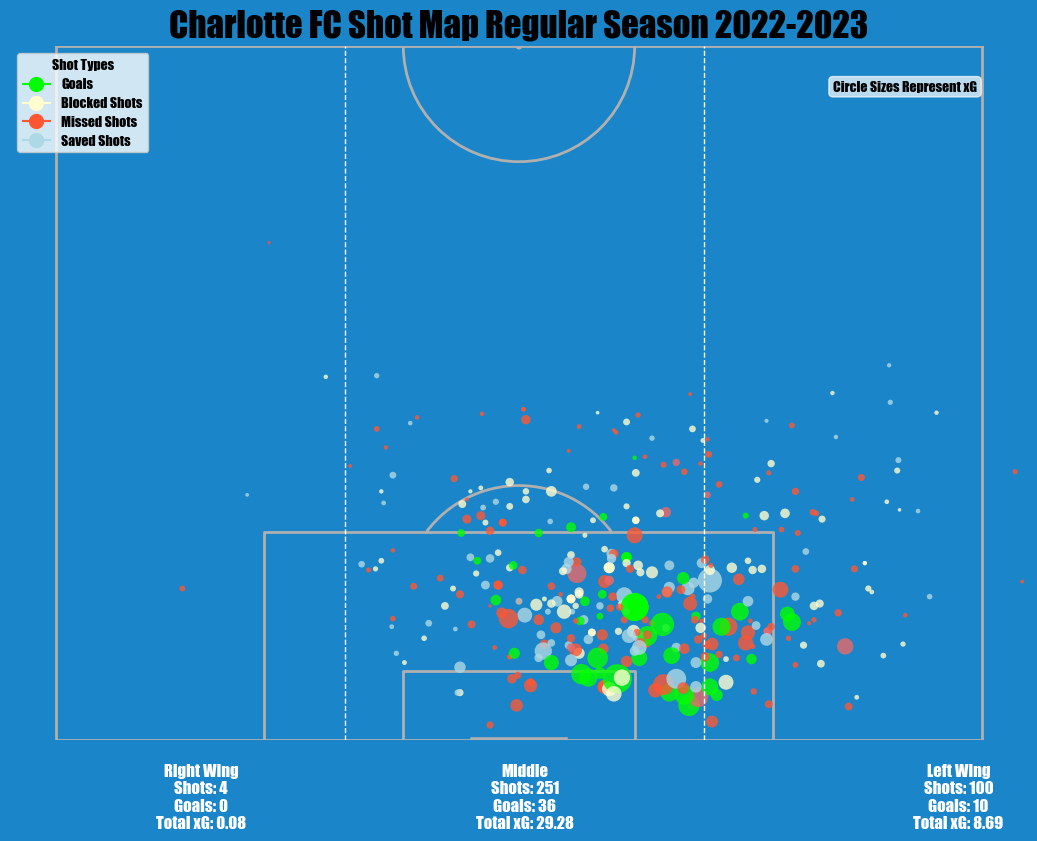

In [517]:
# Create a VerticalPitch with half=True need to pad since the coords are for the bottom half.
pitch = VerticalPitch(half=True, pad_top=-60, pad_bottom=60)

# Get the figure and axis objects from the pitch
fig, ax = pitch.draw(figsize=(13, 8.5))

# Set the background color of the figure and axis
fig.set_facecolor('#1A85C8')
ax.set_facecolor('#1A85C8')

result_df['edge_color'] = '#ea6969'  # Default edge color
result_df['face_color'] = 'none'  # Blank face color

# Change the edge color where shotType is 'goal'
result_df.loc[result_df['shotType'] == 'goal', 'edge_color'] = '#00FF00'
# Change the edge color where shotType is 'block'
result_df.loc[result_df['shotType'] == 'block', 'edge_color'] = '#fffdd0'
# Change the edge color where shotType is 'miss'
result_df.loc[result_df['shotType'] == 'miss', 'edge_color'] = '#FF5733'
# Change the edge color where shotType is 'save'
result_df.loc[result_df['shotType'] == 'save', 'edge_color'] = '#ADD8E6'

# Draw the scatter plot on the main pitch with solid circles and respective edge colors
scatter = plt.scatter(result_df['draw.start.x'], result_df['draw.start.y'], facecolors=result_df['edge_color'],
                      edgecolors='none', marker='o', s=result_df['xg']*500, linewidth=1, alpha=.8, label='Shots Missed')

# Find the minimum and maximum values of 'draw.start.x'
min_x = result_df['draw.start.x'].min()
max_x = result_df['draw.start.x'].max()

# Set specific bounds for each third
bounds = [0, 25, 56, 100]

# Draw vertical lines dividing the pitch into thirds based on specified bounds
for bound in bounds[1:]:
    plt.axvline(x=bound, color='white', linestyle='--', linewidth=1)

# Annotate each third with shots, goals, and xG information at the top
for i in range(len(bounds) - 1):
    subset = result_df[(bounds[i] <= result_df['draw.start.x']) & (result_df['draw.start.x'] < bounds[i + 1])]
    num_goals = len(subset[subset['shotType'] == 'goal'])
    total_xg = subset['xg'].sum()
    plt.text((bounds[i] + bounds[i + 1]) / 2, pitch.dim.top - 2,  # Adjust the vertical position to be at the top
             f'{["Right Wing", "Middle", "Left Wing"][i]}\nShots: {len(subset)}\nGoals: {num_goals}\nTotal xG: {total_xg:.2f}',
             color='white', ha='center', va='top', fontsize=12)

# Customize the scatter plot as needed
plt.title('Charlotte FC Shot Map Regular Season 2022-2023', c='black', fontsize=25)
plt.rcParams["font.family"] = "Impact"

# Add legend with handles using the same edge color and face color as shots
legend_labels = {'goal': 'Goals', 'block': 'Blocked Shots', 'miss': 'Missed Shots', 'save': 'Saved Shots'}
handles = [
    plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markeredgecolor=color, markersize=10, label=label)
    for color, label in zip(['#00FF00', '#fffdd0', '#FF5733', '#ADD8E6'], legend_labels.values())
]
ax.legend(handles=handles, title='Shot Types', loc='upper left')
# Add annotation in the top right corner
plt.annotate('Circle Sizes Represent xG', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='white', alpha=0.7))

plt.show()

In [440]:
#calculates the xg for each side of the pitch using certain plot points
xg_right_wing = result_df.loc[result_df['draw.start.x'] < 25, 'xg'].sum()
xg_middle = result_df.loc[(25 <= result_df['draw.start.x']) & (result_df['draw.start.x'] <= 60), 'xg'].sum()
xg_left_wing = result_df.loc[result_df['draw.start.x'] > 60, 'xg'].sum()

print(f"Total xg for the right side: {xg_right_wing}")
print(f"Total xg for the middle of the pitch: {xg_middle}")
print(f"Total xg for the left side: {xg_left_wing}")

Total xg for the right side: 0.0804188195616
Total xg for the middle of the pitch: 33.991308433197474
Total xg for the left side: 3.970072313211854


In [519]:
# used to print the amount of shots from each side of pitch
right_side_shots = result_df[result_df['draw.start.x'] < 25]
middle_of_pitch_shots = result_df[(25 <= result_df['draw.start.x']) & (result_df['draw.start.x'] <= 60)]
left_side_shots = result_df[result_df['draw.start.x'] > 60]

# Count the number of shots for each part
num_right_side_shots = len(right_side_shots)
num_middle_of_pitch_shots = len(middle_of_pitch_shots)
num_left_side_shots = len(left_side_shots)

# Print the counts
print(f"Number of shots for the right side: {num_right_side_shots}")
print(f"Number of shots for the middle of the pitch: {num_middle_of_pitch_shots}")
print(f"Number of shots for the left side: {num_left_side_shots}")

# Optionally, print the total number of shots
total_shots = num_right_side_shots + num_middle_of_pitch_shots + num_left_side_shots
print(f"Total number of shots: {total_shots}")

Number of shots for the right side: 4
Number of shots for the middle of the pitch: 284
Number of shots for the left side: 67
Total number of shots: 355


In [459]:
#used to get the amount of goals scored from shotType column
goals_right_side = result_df[(result_df['draw.start.x'] < 25) & (result_df['shotType'] == 'goal')]
goals_middle_of_pitch = result_df[((25 <= result_df['draw.start.x']) & (result_df['draw.start.x'] <= 60)) & (result_df['shotType'] == 'goal')]
goals_left_side = result_df[(result_df['draw.start.x'] > 60) & (result_df['shotType'] == 'goal')]

# Count the number of goals for each part
num_goals_right_side = len(goals_right_side)
num_goals_middle_of_pitch = len(goals_middle_of_pitch)
num_goals_left_side = len(goals_left_side)

# Print the counts
print(f"Number of goals for the right side: {num_goals_right_side}")
print(f"Number of goals for the middle of the pitch: {num_goals_middle_of_pitch}")
print(f"Number of goals for the left side: {num_goals_left_side}")

# Optionally, print the total number of goals
total_goals = num_goals_right_side + num_goals_middle_of_pitch + num_goals_left_side
print(f"Total number of goals: {total_goals}")

Number of goals for the right side: 0
Number of goals for the middle of the pitch: 43
Number of goals for the left side: 3
Total number of goals: 46


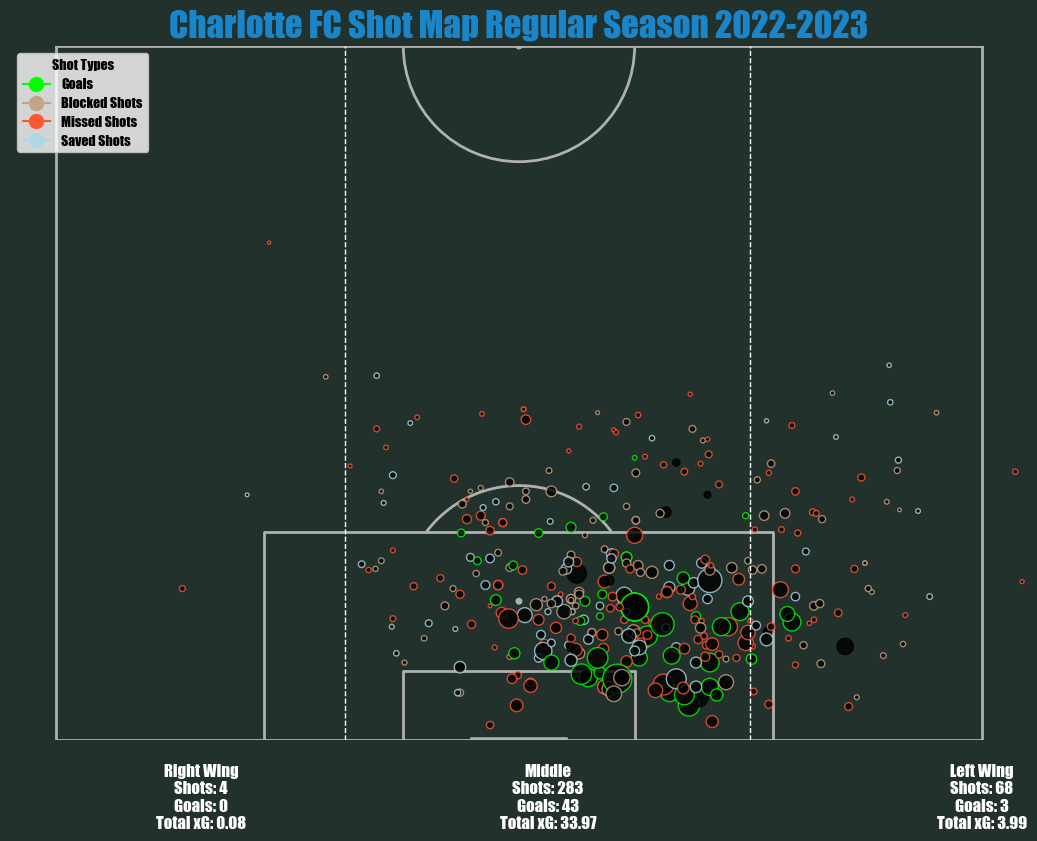

In [489]:
#this was alternative design I was trying to do didnt really like how it turned out though.
# Create a VerticalPitch with half=True
pitch = VerticalPitch(half=True, pad_top=-60, pad_bottom=60)

# Get the figure and axis objects from the pitch
fig, ax = pitch.draw(figsize=(13, 8.5))

# Set the background color of the figure and axis
fig.set_facecolor('#22312B')
ax.set_facecolor('#22312B')

result_df['edge_color'] = 'none'  # Default edge color
result_df['face_color'] = 'none'  # Blank face color

# Change the edge color where shotType is 'goal'
result_df.loc[result_df['shotType'] == 'goal', 'edge_color'] = '#00FF00'
# Change the edge color where shotType is 'block'
result_df.loc[result_df['shotType'] == 'block', 'edge_color'] = '#C4A484'
# Change the edge color where shotType is 'miss'
result_df.loc[result_df['shotType'] == 'miss', 'edge_color'] = '#FF5733'
# Change the edge color where shotType is 'save'
result_df.loc[result_df['shotType'] == 'save', 'edge_color'] = '#ADD8E6'

# Draw the scatter plot on the main pitch with blank circles and respective edge colors
scatter = plt.scatter(result_df['draw.start.x'], result_df['draw.start.y'], facecolors=result_df['face_color'],
                      edgecolors=result_df['edge_color'], marker='o', s=result_df['xg']*500, linewidth=1, alpha=0.8, label='Shots Missed')

# Find the minimum and maximum values of 'draw.start.x'
min_x = result_df['draw.start.x'].min()
max_x = result_df['draw.start.x'].max()

# Set specific bounds for each third
bounds = [0, 25, 60, 100]

# Draw vertical lines dividing the pitch into thirds based on specified bounds
for bound in bounds[1:]:
    plt.axvline(x=bound, color='white', linestyle='--', linewidth=1)

# Annotate each third with shots, goals, and xG information at the top
for i in range(len(bounds) - 1):
    subset = result_df[(bounds[i] <= result_df['draw.start.x']) & (result_df['draw.start.x'] < bounds[i + 1])]
    num_goals = len(subset[subset['shotType'] == 'goal'])
    total_xg = subset['xg'].sum()
    plt.text((bounds[i] + bounds[i + 1]) / 2, pitch.dim.top - 2,  # Adjust the vertical position to be at the top
             f'{["Right Wing", "Middle", "Left Wing"][i]}\nShots: {len(subset)}\nGoals: {num_goals}\nTotal xG: {total_xg:.2f}',
             color='white', ha='center', va='top', fontsize=12)

# Customize the scatter plot as needed
plt.title('Charlotte FC Shot Map Regular Season 2022-2023', c='#1A85C8', fontsize=25)
plt.rcParams["font.family"] = "Impact"

# Add legend with handles using manually matched colors
legend_labels = {'goal': 'Goals', 'block': 'Blocked Shots', 'miss': 'Missed Shots', 'save': 'Saved Shots'}
handles = [
    plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markeredgecolor=color, markersize=10, label=label)
    for color, label in zip(['#00FF00', '#C4A484', '#FF5733', '#ADD8E6'], legend_labels.values())
]
ax.legend(handles=handles, title='Shot Types', loc='upper left')

plt.show()